In [21]:
###########
# Imports #
###########

# importing libraries
import matplotlib.pyplot as plt
import copy
import numpy as np

# importing algorithms
# from BFGS_multistart import*
# from Stochastic_local_search import*
# from Cuadratic_opt_v2 import *
# from Scipy_opt_algs import*
# from BO_NpScpy import*
# importing test functions
from test_function import *
from utils import *
#from COBYQA import *
# from opt_GPyOpt import *

# from ScikitQuant_opt_algs import *
# from pySOT_opt_algs import *
from CUATRO import *
# from ENTMOOT import *
#from TuRBO import *
from CSTR_PID import *
# from BFGS_multistart import*
# from Stochastic_local_search import*
# from Cuadratic_opt_v2 import *
# from Scipy_opt_algs import*
# from BO_NpScpy import*
# importing test functions
from test_function import*
from utils import *
from COBYQA import *
# from ScikitQuant_opt_algs import *
# from pySOT_opt_algs import *
# from CUATRO import *
# from ENTMOOT import *

##########################
# Algorithms & Functions #
##########################

algorithms_test = [
    # opt_SnobFit,
    # opt_SRBF,
    # opt_DYCORS,
    # opt_SOP,
    # opt_COBYLA,
    #TuRBO_Optimizer,
    #COBYQA,
    # opt_CUATRO,
    opt_CUATRO_pls,
    # GPyOpt_BO
    # took ENTMOOT and our implementation of BO (BO_np_scipy) and LS_QM_V2 out
]

functions_test = ["cstr_pid_f"]


###########################
# Optimization parameters #
###########################

# Number of input dimensions
N_x_l = [32]  

# starting points on the trajectory of the algorithm on the test function
start_ = [15]  

reps = 1

# These are the number of function evaluations (length of trajectory) foreach run in reps. The number depends on the input dimension N_x_l
f_eval_l = [150]  

home_dir  = 'images/CSTR_PID/trajectory_plots_1D_&_tables'
SafeData = True

In [22]:
info, trajectories, timestamp = ML4CE_uncon_eval(
    N_x_l, f_eval_l, functions_test, algorithms_test, reps, home_dir, SafeData=SafeData
)

=====================  cstr_pid_f D32
==  opt_CUATRO_pls


  0%|          | 0/1 [00:00<?, ?it/s]

TR update: iteration 1, objective 209.208, evaluation 7
TR update: iteration 3, objective 133.278, evaluation 19


100%|██████████| 1/1 [00:03<00:00,  3.43s/it]

TR update: iteration 19, objective 132.032, evaluation 115


### Benchmark

### Load trajectories

In [23]:
# import pickle

# # Open the file in binary mode for reading
# with open(r'C:\Users\mathi\OneDrive\01_Studium\PhD\Projects\01_Book_Chapter\DDO-4-ChemEng\Benchmarking\01_unconstrained\images\CSTR_PID\trajectory_plots_1D_&_tables\2024-07-11_10-39-45\trajectories.pkl', 'rb') as file:
#     # Load the object from the file
#     trajectories = pickle.load(file)

# # when loading data make sure to copy the folder name to get the timestamp
# timestamp = '2024-07-11_10-39-45'

### Plot performance tables 

In [24]:
array = ML4CE_uncon_table(
    trajectories, algorithms_test, functions_test, "cstr_pid_f", N_x_l, start_
)

==   opt_CUATRO_pls  ==


In [25]:
ML4CE_uncon_table_plot(
    array, functions_test, algorithms_test, N_x_l, home_dir, timestamp, SafeFig=SafeData
)

The directory 'images/CSTR_PID/trajectory_plots_1D_&_tables\2024-07-13_15-58-54\tables' does not exist in the root directory. Creating directory.


### Plot graphs

The directory 'images/CSTR_PID/trajectory_plots_1D_&_tables\2024-07-13_15-58-54\trajectory_plots_1D' does not exist in the root directory.


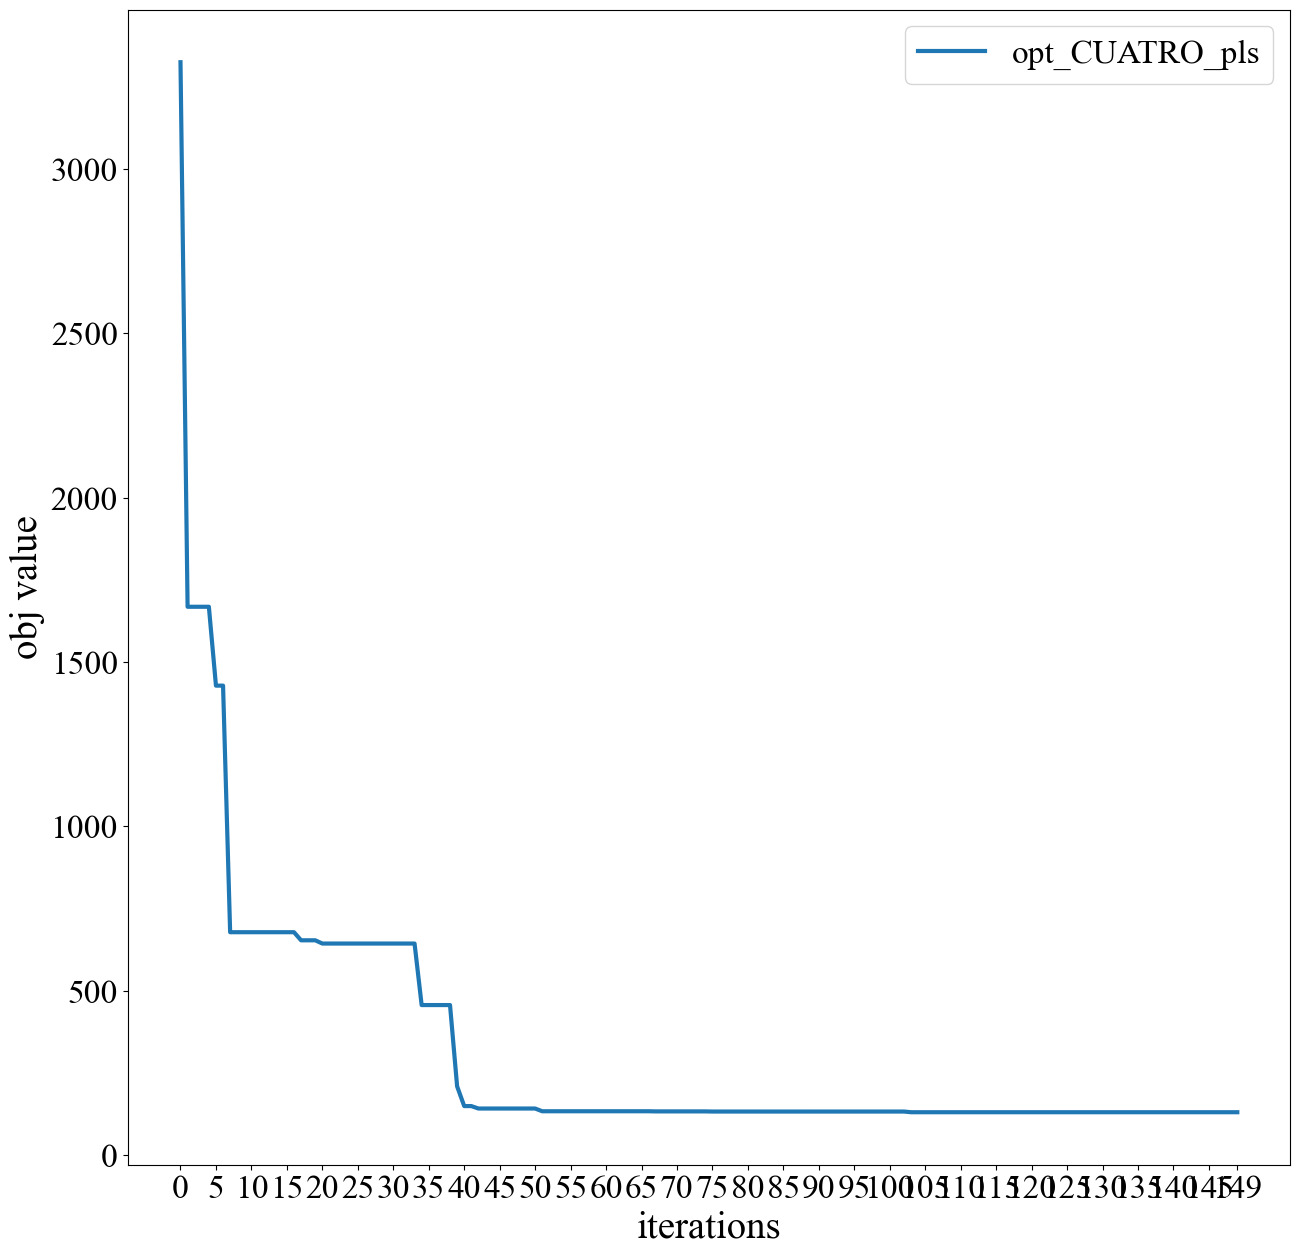

In [26]:
ML4CE_uncon_graph_abs(
    trajectories,
    algorithms_test,
    functions_test,
    N_x_l,
    home_dir,
    timestamp,
    SafeFig=SafeData,
)

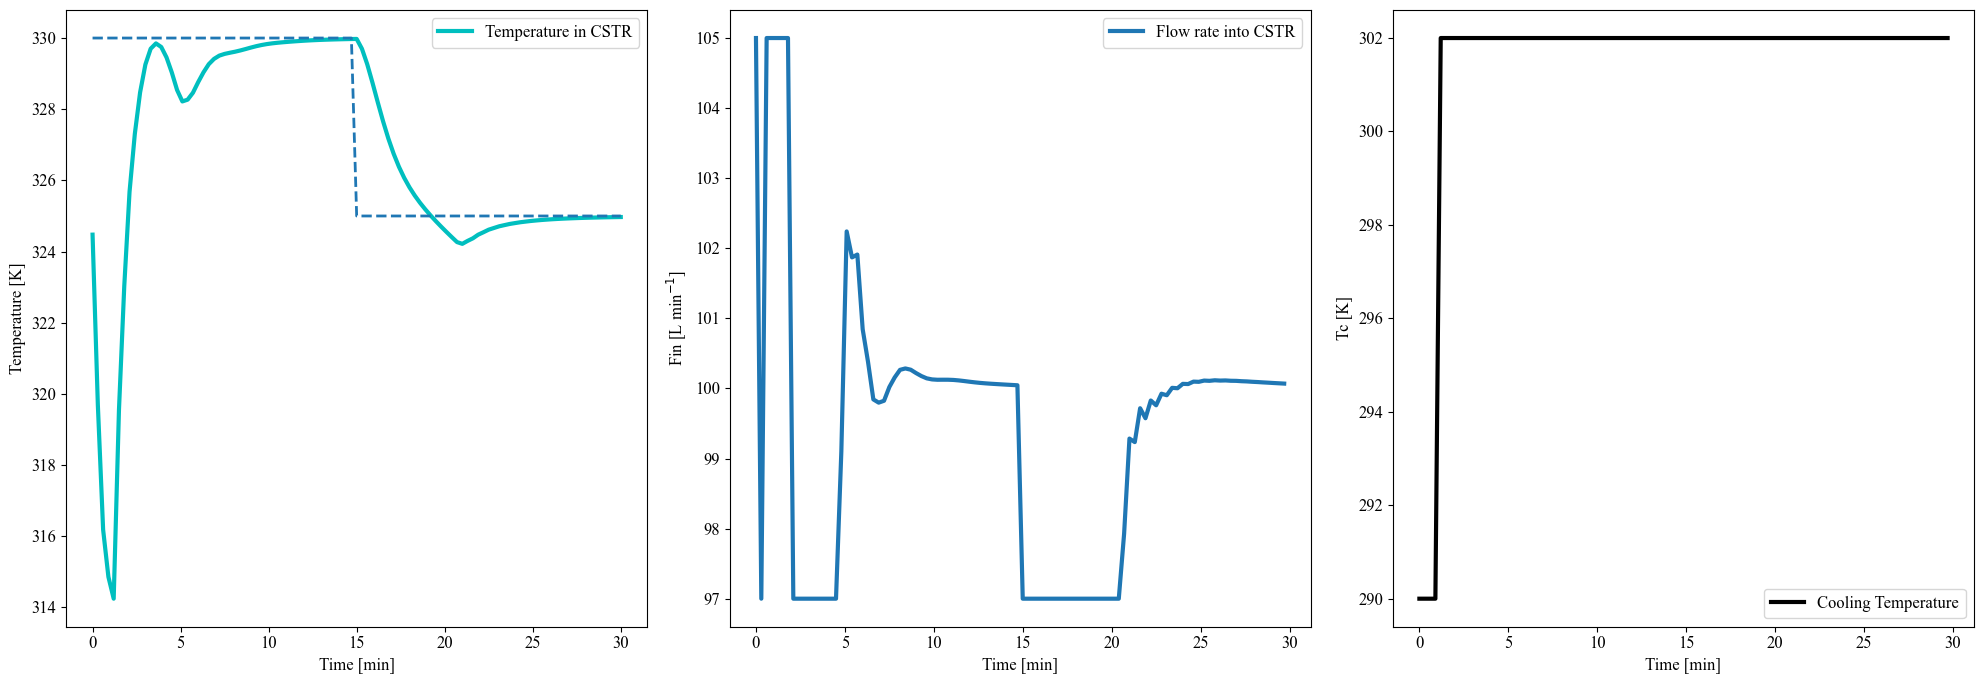

In [27]:
K_opt = trajectories['D32']['cstr_pid_f']['x_list']['opt_CUATRO_pls'][0][-1]
CSTR = CSTRSimulation()
CSTR.plot_result_ct(K_opt)

Creating the PID Tuning Trajectory Plots for Best Algorithm

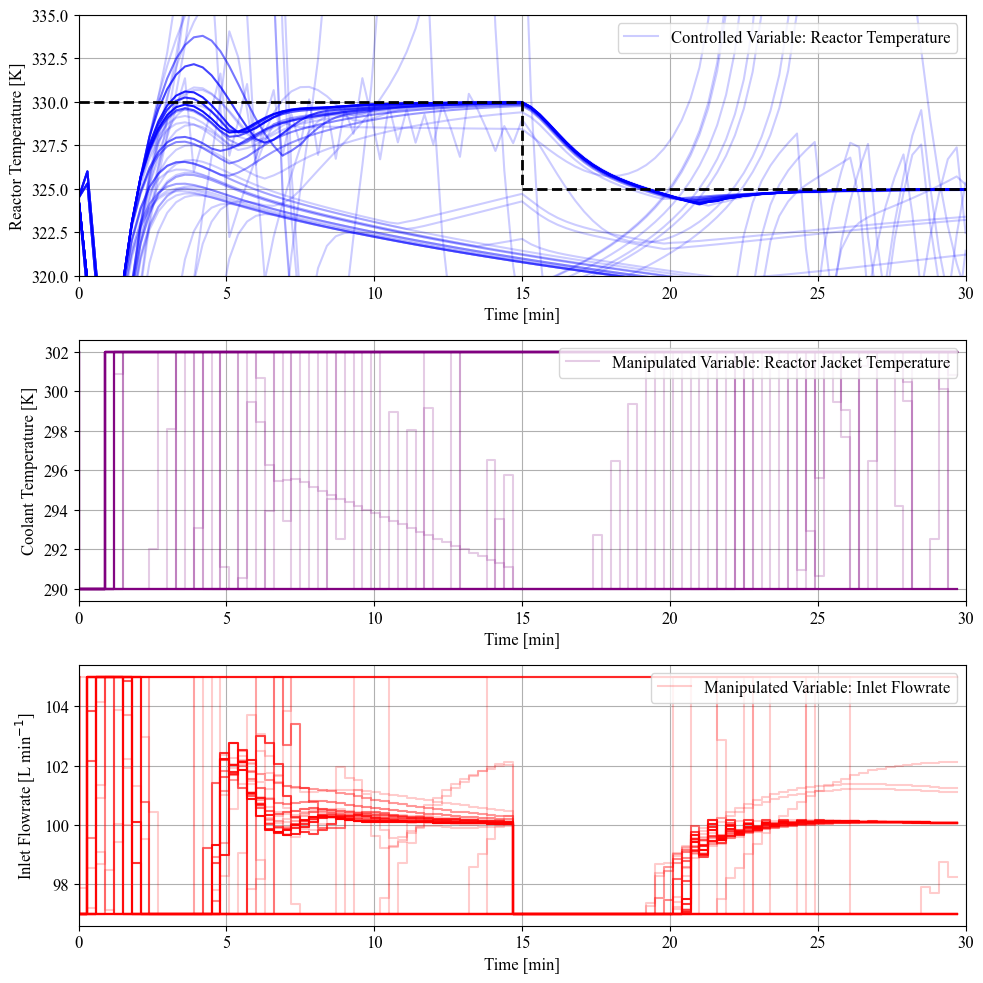

In [44]:
# Extracting trajectories for plotting
T_des = [330 for i in range(51)] + [325 for i in range(50)]
temp_trajectories = trajectories['D32']['cstr_pid_f']['PID_traj']['opt_CUATRO_pls'][0]['T']
tc_trajectories = trajectories['D32']['cstr_pid_f']['PID_traj']['opt_CUATRO_pls'][0]['Tc']
flow_trajectories = trajectories['D32']['cstr_pid_f']['PID_traj']['opt_CUATRO_pls'][0]['Fin']
time_span = trajectories['D32']['cstr_pid_f']['PID_traj']['opt_CUATRO_pls'][0]['t_c'][0][0]

# Custom alpha to show earlier trajectories more faintly
alpha_values = np.zeros(len(temp_trajectories))  
for i in range(0, len(temp_trajectories), 10):
    alpha_values[i] = (i / len(temp_trajectories))
alpha_values[:50] = 0.2

# Define the font properties for Times New Roman
font_properties = {'family': 'Times New Roman', 'size': 12}

plt.figure(figsize=(10, 10))

# First subplot for temperature trajectories
plt.subplot(3, 1, 1)
for idx, trajectory in enumerate(temp_trajectories):
    alpha = alpha_values[idx]
    plt.plot(time_span, np.array(trajectory).reshape(101,), color='blue', lw=1.5, alpha=alpha)
plt.step(time_span, T_des, '--', lw=2, color='black')
plt.ylabel('Reactor Temperature [K]', **font_properties)
plt.xlabel('Time [min]', **font_properties)
plt.ylim([320, 335])
plt.xlim([0, 30])
plt.grid(True)
plt.xticks(fontsize=14, **font_properties)
plt.yticks(fontsize=14, **font_properties)
plt.legend(['Controlled Variable: Reactor Temperature'], loc='upper right', fontsize=12, prop=font_properties)

# Second subplot for Tc trajectories
plt.subplot(3, 1, 2)
for idx, trajectory in enumerate(tc_trajectories):
    alpha = alpha_values[idx]
    plt.step(time_span[:-1], np.array(trajectory).reshape(100,), color='purple', lw=1.5, alpha=alpha)
plt.xlim([0, 30])
plt.ylabel('Coolant Temperature [K]', **font_properties)
plt.xlabel('Time [min]', **font_properties)
plt.grid(True)
plt.xticks(fontsize=14, **font_properties)
plt.yticks(fontsize=14, **font_properties)
plt.legend(['Manipulated Variable: Reactor Jacket Temperature'], loc='upper right', fontsize=12, prop=font_properties)

# Third subplot for Fin trajectories
plt.subplot(3, 1, 3)
for idx, trajectory in enumerate(flow_trajectories):
    alpha = alpha_values[idx]
    plt.step(time_span[:-1], np.array(trajectory).reshape(100,), color='red', lw=1.5, alpha=alpha)
plt.xlim([0, 30])
plt.ylabel('Inlet Flowrate [L min$^{-1}$]', **font_properties)
plt.xlabel('Time [min]', **font_properties)
plt.grid(True)
plt.xticks(fontsize=14, **font_properties)
plt.yticks(fontsize=14, **font_properties)
plt.legend(['Manipulated Variable: Inlet Flowrate'], loc='upper right', fontsize=12, prop=font_properties)

# Save the figure as a high-quality image
plt.tight_layout(h_pad=0.75)
plt.savefig('CSTR_PID_Trajectories.png', dpi=800)
plt.show()